In [1]:
# Mount Drive Folder to Colab [Local]
from google.colab import drive
drive.mount("/content/gdrive")

!ln -s /content/gdrive/My\ Drive/ /mydrive
%cd /mydrive/learnings/Segmentation
!ls

Mounted at /content/gdrive
/content/gdrive/My Drive/learnings/Segmentation
datasets			     yolo11n.pt
imgDataSet			     yolo11n-seg.pt
learn_yolov8_sem_segmantation.ipynb  yolo_obb_sam.ipynb
Mask_RCNN_Det.ipynb		     yolo_sam.ipynb
runs				     yoloV11_instance.ipynb
SAM_Seg.ipynb			     yolov8n.pt
sam_vit_h_4b8939.pth		     yolov8_obb_sam.ipynb


In [2]:
!nvidia-smi

Thu Jul 10 07:20:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Requirements
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [4]:
# Libraries
import os
import sys
import cv2 as cv
import numpy as np
import random
import torch
import matplotlib.pyplot as plt
import ultralytics
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
image_path = 'datasets/real-tester'

In [16]:
def randomly_selected_images(image_path, num_selected=1):
  all_images = [image for image in os.listdir(image_path) if image.lower().endswith((".png",".jpg",".jpeg"))]
  if len(all_images) == 0:
    print("Empty image folder")
    return []

  num_img = min(num_selected, len(all_images))
  selected = random.sample(all_images, num_img)

  if num_selected == 1:
    print(f"\033[92mRandomly Selected {num_img} images:\033[0m {selected[0]}\n--------------------")
  else:
    print(f"\033[92mRandomly Selected {num_img} images:\033[0m\n" + "\n".join(f"{i + 1} --> {item}" for i, item in enumerate(selected)) + "\n--------------------")
  return selected

In [7]:
# Plotter
def display_detected_images(images, subtitles=None):
  n = len(images)
  fig, axs = plt.subplots(1, n, figsize=(8, 5))
  if n == 1:
    axs = [axs]

  for i, img in enumerate(images):
      axs[i].imshow(img)
      axs[i].axis('off')
      if subtitles:
        axs[i].set_title(subtitles[i])
      else:
        axs[i].set_title("Unknown")

  # plt.suptitle(f"Binary Object Detection - Image")
  plt.tight_layout()
  plt.show()

# Train

In [ ]:
epochs = 50
classNames = ["Clipper", "Stapler", "Mouse", "Cup"]

data_yaml = "/content/gdrive/MyDrive/learnings/Segmentation/datasets/multi-instance/data.yaml"

model = YOLO('yolo11n-seg.pt')
train_model = model.train(data=data_yaml, epochs=epochs, imgsz=640)

100%|██████████| 5.90M/5.90M [00:00<00:00, 201MB/s]

Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/learnings/Segmentation/datasets/multi-instance/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/gdrive/MyDrive/learnings/Segmentation/datasets/multi-instance/train/labels.cache... 279 images, 0 backgrounds, 0 corrupt: 100%|██████████| 279/279 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.7±0.4 ms, read: 105.5±42.8 MB/s, size: 566.6 KB)


val: Scanning /content/gdrive/MyDrive/learnings/Segmentation/datasets/multi-instance/valid/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50       3.4G     0.7754      1.545      3.264     0.9918         29        640: 100%|██████████| 18/18 [00:11<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         25         75     0.0102      0.989      0.373      0.295     0.0098      0.948      0.356      0.237



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50       3.4G      0.677     0.8801      2.451     0.8938         50        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         25         75     0.0104          1      0.657      0.597     0.0103      0.983       0.65      0.479



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50       3.4G     0.6534      0.738      1.646     0.8831         42        640: 100%|██████████| 18/18 [00:10<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         25         75      0.939      0.224      0.611      0.522      0.718      0.211      0.542      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50       3.4G     0.6357     0.7609      1.243     0.8841         60        640: 100%|██████████| 18/18 [00:10<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         25         75      0.792      0.175      0.749      0.631      0.792      0.175      0.718      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50       3.4G     0.6063     0.6539      1.084     0.8709         48        640: 100%|██████████| 18/18 [00:08<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         25         75      0.838      0.516      0.833      0.721      0.831      0.509      0.809      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50       3.4G     0.5997     0.6185     0.9947     0.8628         49        640: 100%|██████████| 18/18 [00:09<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         25         75      0.818      0.911      0.883      0.779      0.818      0.911      0.883      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       3.4G     0.5676     0.6283     0.9032     0.8563         49        640: 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         25         75      0.901      0.879      0.903      0.802       0.89      0.866      0.893      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50       3.4G     0.5297     0.5758     0.8363     0.8537         54        640: 100%|██████████| 18/18 [00:09<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         25         75      0.818      0.903      0.936      0.834      0.816      0.899      0.922      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       3.4G     0.5414      0.575      0.817     0.8498         48        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         25         75      0.957      0.884      0.978      0.893      0.957      0.884      0.978      0.756



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       3.4G     0.5241     0.5622     0.7763     0.8464         62        640: 100%|██████████| 18/18 [00:08<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         25         75      0.924      0.964      0.972      0.911      0.924      0.964      0.972       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50       3.4G      0.512     0.5524     0.7414     0.8483         48        640: 100%|██████████| 18/18 [00:08<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         25         75      0.933      0.934       0.97      0.903      0.933      0.934       0.97      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50       3.4G     0.5191     0.5381     0.7384     0.8448         69        640: 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         25         75      0.973          1      0.989       0.91      0.956      0.983      0.972      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50       3.4G     0.4806     0.4938     0.6846     0.8427         52        640: 100%|██████████| 18/18 [00:10<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         25         75      0.869      0.965      0.986      0.909      0.869      0.965      0.986      0.807



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.4G     0.5027     0.5342     0.6815     0.8506         39        640: 100%|██████████| 18/18 [00:09<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]

                   all         25         75      0.947      0.948      0.967      0.884      0.947      0.948      0.967        0.8



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       3.4G     0.4982     0.4929     0.6781     0.8472         52        640: 100%|██████████| 18/18 [00:07<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         25         75      0.849      0.986      0.986        0.9      0.849      0.986      0.986      0.775



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50       3.4G     0.4688     0.5289      0.641     0.8297         36        640: 100%|██████████| 18/18 [00:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.16s/it]

                   all         25         75      0.942      0.929       0.97      0.908      0.942      0.929       0.97      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50       3.4G     0.4567     0.5197     0.6193     0.8372         58        640: 100%|██████████| 18/18 [00:09<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         25         75      0.958      0.968      0.979      0.928      0.958      0.968      0.979      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50       3.4G     0.4327     0.4837     0.6009     0.8326         37        640: 100%|██████████| 18/18 [00:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         25         75      0.979      0.991      0.988      0.932      0.979      0.991      0.988      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50       3.4G     0.4492     0.5194     0.5994     0.8328         72        640: 100%|██████████| 18/18 [00:09<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         25         75      0.896      0.931       0.94      0.893      0.896      0.931       0.94      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50       3.4G     0.4218     0.4886      0.559     0.8288         50        640: 100%|██████████| 18/18 [00:07<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         25         75      0.858      0.933      0.951      0.902      0.858      0.933      0.951      0.798



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       3.4G     0.4293     0.4971     0.5731      0.832         53        640: 100%|██████████| 18/18 [00:09<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         25         75      0.917       0.94      0.972       0.92      0.917       0.94      0.972      0.802



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50       3.4G     0.4281     0.4648     0.5617     0.8306         52        640: 100%|██████████| 18/18 [00:09<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         25         75      0.979      0.993      0.984       0.93      0.979      0.993      0.984      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50       3.4G     0.4149     0.4568     0.5337     0.8322         48        640: 100%|██████████| 18/18 [00:09<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]

                   all         25         75      0.943      0.966      0.972      0.944      0.943      0.966      0.972      0.825



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.4G     0.4151     0.4764     0.5375     0.8343         39        640: 100%|██████████| 18/18 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]

                   all         25         75      0.942      0.945       0.96      0.925      0.942      0.945       0.96      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50       3.4G     0.3928     0.4385     0.5032     0.8234         41        640: 100%|██████████| 18/18 [00:08<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         25         75      0.861      0.971      0.966      0.934      0.861      0.971      0.966      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       3.4G     0.3833     0.4412     0.4933     0.8235         53        640: 100%|██████████| 18/18 [00:09<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         25         75      0.925      0.965      0.966      0.935      0.925      0.965      0.966      0.812



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50       3.4G     0.3825      0.448     0.4826     0.8273         45        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         25         75      0.967      0.981      0.973      0.951      0.967      0.981      0.973      0.815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50       3.4G     0.3631     0.4415     0.4847     0.8225         38        640: 100%|██████████| 18/18 [00:08<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         25         75      0.917      0.985      0.983      0.955      0.917      0.985      0.983      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50       3.4G      0.369      0.448     0.4678     0.8254         47        640: 100%|██████████| 18/18 [00:08<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         25         75      0.944      0.961      0.976      0.944      0.944      0.961      0.976      0.847



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.4G     0.3678     0.4531     0.4614     0.8195         43        640: 100%|██████████| 18/18 [00:10<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         25         75       0.91      0.978      0.972       0.95       0.91      0.978      0.972      0.841



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.4G     0.3543     0.4422     0.4515     0.8161         42        640: 100%|██████████| 18/18 [00:09<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         25         75      0.958      0.983      0.987      0.958      0.958      0.983      0.987      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50       3.4G     0.3609     0.4232     0.4567     0.8211         43        640: 100%|██████████| 18/18 [00:10<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         25         75      0.926      0.999      0.983      0.949      0.926      0.999      0.983      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50       3.4G     0.3464     0.4097     0.4436     0.8244         51        640: 100%|██████████| 18/18 [00:08<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         25         75      0.933          1      0.983      0.949      0.933          1      0.983      0.846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50       3.4G     0.3468      0.423     0.4357     0.8207         61        640: 100%|██████████| 18/18 [00:08<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         25         75       0.97       0.98      0.984      0.946       0.97       0.98      0.984      0.856



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50       3.4G     0.3482     0.4026     0.4233     0.8161         47        640: 100%|██████████| 18/18 [00:09<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         25         75      0.919      0.983      0.962      0.931      0.919      0.983      0.962      0.831



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50       3.4G     0.3626     0.4306     0.4214     0.8202         52        640: 100%|██████████| 18/18 [00:09<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         25         75      0.954      0.983      0.983       0.96      0.954      0.983      0.983       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       3.4G     0.3451     0.3955     0.4175     0.8188         53        640: 100%|██████████| 18/18 [00:10<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all         25         75       0.97          1      0.985      0.959       0.97          1      0.985      0.845



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.4G     0.3423      0.406     0.4079      0.818         56        640: 100%|██████████| 18/18 [00:07<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         25         75      0.958      0.985      0.984      0.956      0.958      0.985      0.984      0.853



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50       3.4G     0.3239     0.3906     0.3983     0.8201         33        640: 100%|██████████| 18/18 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         25         75      0.948      0.985      0.981      0.957      0.948      0.985      0.981       0.85



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50       3.4G      0.326     0.3796     0.3999     0.8182         31        640: 100%|██████████| 18/18 [00:11<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         25         75      0.967      0.984      0.983      0.963      0.967      0.984      0.983      0.853


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50       3.4G     0.2842     0.3309     0.4409     0.7846         19        640: 100%|██████████| 18/18 [00:12<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         25         75      0.964      0.998      0.981      0.962      0.964      0.998      0.981      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50       3.4G     0.2769     0.3303     0.4124     0.7797         27        640: 100%|██████████| 18/18 [00:08<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         25         75      0.966      0.998      0.983      0.961      0.966      0.998      0.983      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50       3.4G     0.2586     0.3182      0.387     0.7702         22        640: 100%|██████████| 18/18 [00:06<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         25         75      0.963      0.985      0.984       0.97      0.963      0.985      0.984      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50       3.4G     0.2592     0.3149     0.3846      0.782         26        640: 100%|██████████| 18/18 [00:08<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         25         75       0.96      0.983      0.982      0.971       0.96      0.983      0.982      0.844



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50       3.4G       0.26     0.3239     0.3741      0.781         20        640: 100%|██████████| 18/18 [00:08<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         25         75       0.97      0.985      0.974      0.961       0.97      0.985      0.974      0.834



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50       3.4G     0.2413     0.3049     0.3635     0.7843         27        640: 100%|██████████| 18/18 [00:06<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         25         75      0.968      0.989      0.985      0.965      0.968      0.989      0.985      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50       3.4G     0.2327      0.295     0.3557     0.7749         25        640: 100%|██████████| 18/18 [00:08<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         25         75      0.959          1       0.99      0.973      0.959          1       0.99      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       3.4G     0.2356     0.3094     0.3538      0.778         23        640: 100%|██████████| 18/18 [00:08<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         25         75      0.959          1       0.99      0.969      0.959          1       0.99      0.854



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       3.4G     0.2278     0.3066     0.3477     0.7761         23        640: 100%|██████████| 18/18 [00:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.04s/it]

                   all         25         75      0.945          1      0.991      0.972      0.945          1      0.991      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50       3.4G     0.2185     0.2953     0.3424      0.782         22        640: 100%|██████████| 18/18 [00:07<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]

                   all         25         75      0.965          1      0.991       0.97      0.965          1      0.991      0.852



50 epochs completed in 0.154 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.163 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,348 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


                   all         25         75      0.945          1      0.991      0.969      0.945          1      0.991      0.858
               linepen         18         18      0.894          1      0.995      0.989      0.894          1      0.995      0.872
                   pen         15         15      0.996          1      0.995      0.951      0.996          1      0.995      0.837
                 spoon         19         19        0.9          1      0.977      0.955        0.9          1      0.977      0.872
               stapler         20         23      0.989          1      0.995      0.982      0.989          1      0.995      0.853
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/segment/train


# Test

In [8]:
test_images = [[os.path.join("datasets/multi-instance/test/images", image) for image in os.listdir("datasets/multi-instance/test/images")][0]]

yolov11_model = YOLO("/content/gdrive/MyDrive/learnings/Segmentation/runs/segment/train/weights/best.pt")

In [9]:
def test_model(model, test_data):

  for img_num, image_path in enumerate(test_data):
    image_bgr = cv.imread(image_path)
    if image_bgr is None:
        print(f"Image at path '{image_path}' could not be loaded.")
        continue

    # Run model
    results = model.predict(source=image_bgr, conf=0.50, show_boxes=False, save=False, verbose=False)[0]
    # print(len(results))

    # Convert original image for display
    original = cv.cvtColor(image_bgr, cv.COLOR_BGR2RGB)


    # Plot detection result
    tested_img = results.plot()
    tested_yolo = cv.cvtColor(tested_img, cv.COLOR_BGR2RGB)

    # Plot side-by-side
    display_img = [original, tested_yolo]
    subtitles = ["Original", "Tested YoloV11-Instance"]

    display_detected_images(display_img, subtitles=subtitles)

--------------------
Multi-Instance - YoloV11 
--------------------
Test Images: 1 
--------------------


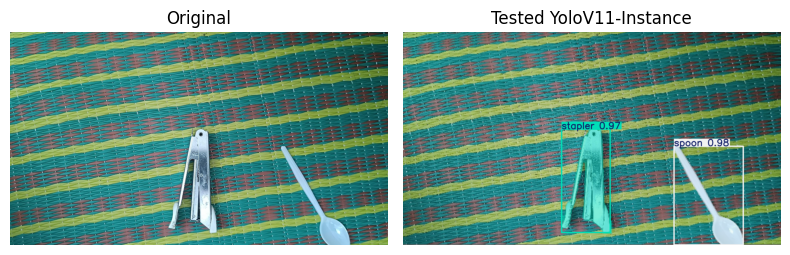

In [10]:
# Run the Trained YOLO Model
print("--------------------\n\033[92mMulti-Instance - YoloV11\033[0m \n--------------------")
print(f"\033[92mTest Images: {len(test_images)}\033[0m \n--------------------")

test_model(yolov11_model, test_images)

-------------------- 
Multi-Instance - YoloV11 
--------------------
Randomly Selected 1 images: IMG_20250708_083124.jpg
--------------------


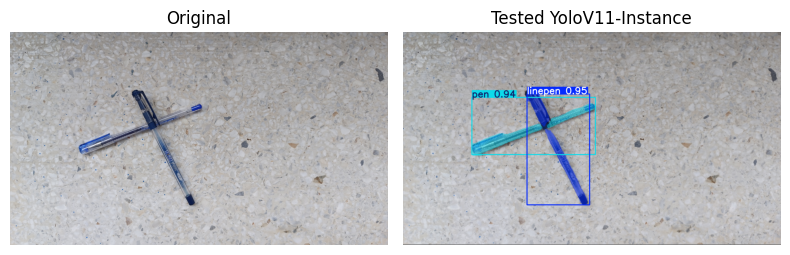

In [17]:
print("-------------------- \n\033[92mMulti-Instance - YoloV11\033[0m \n--------------------")
selected_images = randomly_selected_images(image_path, num_selected=1)
tst = [os.path.join(image_path, f) for f in selected_images]
test_model(yolov11_model, tst)